In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
titanic_data = pd.read_csv('train.csv')
titanic_data['Sex'] = titanic_data['Sex'].replace({'male': 0, 'female': 1})
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,28.0,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


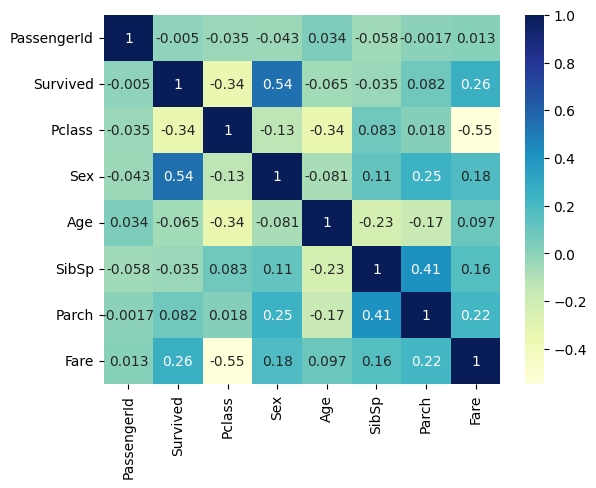

In [27]:
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

<Axes: >

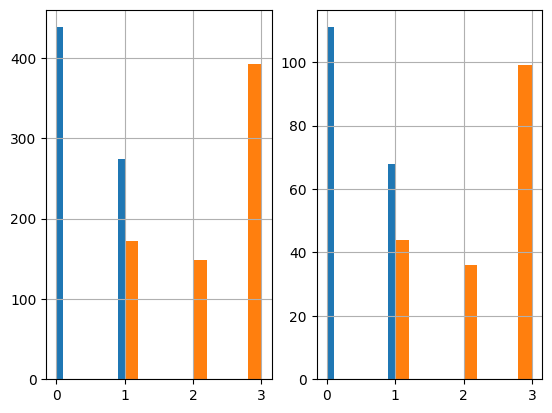

In [38]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 261 to 633
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [47]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf  = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True )
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [50]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [51]:
X_test = strat_test_set.drop(['Survived'], axis = 1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [52]:
final_clf.score(X_data_test, y_data_test)

0.7932960893854749

In [55]:
X_final = titanic_data.drop(['Survived'], axis = 1)
y_final = titanic_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [56]:
prod_clf  = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True )
grid_search.fit(X_data_final, y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [58]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [61]:
titanic_test_data = pd.read_csv('test.csv')
titanic_test_data.isna().sum()
titanic_test_data['Sex'] = titanic_test_data['Sex'].replace({'male': 0, 'female': 1})
titanic_test_data['Age'] = titanic_test_data['Age'].fillna(titanic_test_data['Age'].median())
titanic_test_data['Fare'] = titanic_test_data['Fare'].fillna(titanic_test_data['Fare'].median())
titanic_test_data = titanic_test_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,3,0,38.5,0,0,7.2500
416,1308,3,0,27.0,0,0,8.0500


In [63]:
X_final_test = titanic_test_data

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [64]:
predictions = prod_final_clf.predict(X_data_final_test)

In [66]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('predictionsTitanic.csv', index = False )

In [67]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
